In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Loading the dataset to pandas DataFrame

In [87]:
df=pd.read_csv("LoanStatus.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Detailed information about our dataset

 Loan_ID : Unique Loan ID

 Gender : Male/ Female

 Married : Applicant married (Y/N)

 Dependents : Number of dependents

 Education : Applicant Education (Graduate/ Under Graduate)

 Self_Employed : Self employed (Y/N)

 ApplicantIncome : Applicant income

 CoapplicantIncome : Coapplicant income

 LoanAmount : Loan amount in thousands of dollars

 Loan_Amount_Term : Term of loan in months

 Credit_History : Credit history meets guidelines yes or no

 Property_Area : Urban/ Semi Urban/ Rural

 Loan_Status : Loan approved (Y/N) this is the target variable

# 1.Our dataset type:

In [88]:
type(df)

pandas.core.frame.DataFrame

# 2. Display Top 5 Rows of The Dataset

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Display Last 5 Rows of The Dataset

In [90]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# 4. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [91]:
df.shape

(614, 13)

In [92]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 614
Number of Columns 13


# 5.Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 6.Statistical measure of our dataset

In [94]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 7.Check Null Values In The Dataset

In [95]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
df.isnull().sum()*100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Here we can notice first 5 and last 5 rows of the dataset. The above dataset shows that there are 614 rows and 13 columns present. The dataset contains both dependent and independent variables. In this dataset "Loan_Status" is the target variable and the remaining feature columns that determine or help in predicting the loan status of individual.. Also the dataset contains both categorical and numerical types of data.

In [97]:
df["Loan_ID"].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [98]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [99]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [100]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [101]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [102]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [103]:
df["ApplicantIncome"].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [104]:
df["CoapplicantIncome"].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [105]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [106]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [107]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [108]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [109]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Heatmap

<AxesSubplot:>

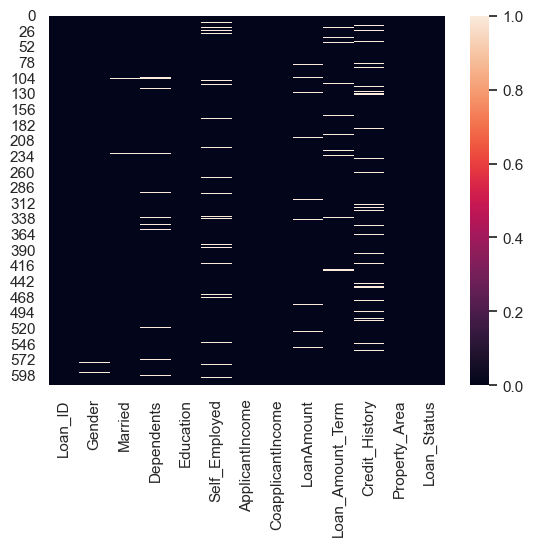

In [110]:
sns.heatmap(df.isnull())

# 8.Handling The missing Values

In [111]:
df = df.drop('Loan_ID',axis=1)

In [112]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [113]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [114]:
df = df.dropna(subset=columns)

In [115]:
df.isnull().sum()*100 / len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [116]:
df['Self_Employed'].mode()[0]

'No'

In [117]:
df['Self_Employed'] =df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [118]:
df.isnull().sum()*100 / len(df)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [119]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [120]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [121]:
df['Credit_History'].mode()[0]

1.0

In [122]:
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [123]:
df.isnull().sum()*100 / len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# 9.Handling Categorical Columns

For getting random 5 dataset row from our dataset we use df.sample()

In [124]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
213,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
169,Male,Yes,2,Graduate,No,8000,0.0,200.0,360.0,1.0,Semiurban,Y
220,Male,Yes,0,Graduate,No,2221,0.0,60.0,360.0,0.0,Urban,N
76,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,N
172,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N


In [125]:
df['Dependents'] =df['Dependents'].replace(to_replace="3+",value='4')

In [126]:
df['Dependents'].unique()                          #unique values in dependent column

array(['1', '0', '2', '4'], dtype=object)

In [127]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

# 10.Converting categorical data into numeric data

In [128]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [129]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [130]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# 11. Storing Feature Matrix In X And Response (Target) In Vector y

# Splitting data into feature and target


In [131]:
X = df.drop('Loan_Status',axis=1)

In [132]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [133]:
y = df['Loan_Status']

In [134]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

# 12. Feature Scaling

In [135]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [136]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[cols]=sc.fit_transform(X[cols])

In [138]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# 13.Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [140]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [141]:
model_df

{}

# 14. Logistic Regression

Logistic regression is a type of regression that predicts the probability of a binary outcome, such as yes or no, spam or not spam, or crack or no crack.

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


# 15. SVC

SVCs work by mapping data points to a high-dimensional space and then finding the best boundary between the different classes

In [143]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


# 16. Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7117117117117117
DecisionTreeClassifier() Avg cross val score is 0.7125143325143326


# 17. Random Forest Classifier# 

In [145]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7657657657657657
RandomForestClassifier() Avg cross val score is 0.7848648648648648


Education & Loan Status

<AxesSubplot:xlabel='Education', ylabel='count'>

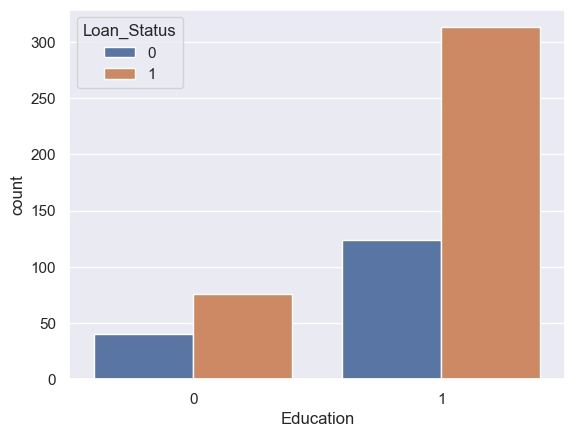

In [146]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

marital status & Loan Status

<AxesSubplot:xlabel='Married', ylabel='count'>

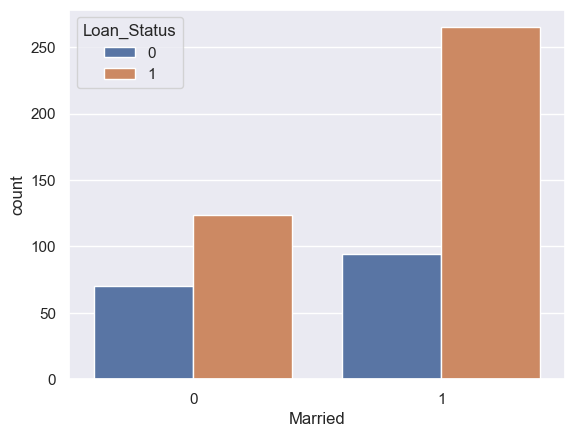

In [147]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

C:\Users\Shreeya Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


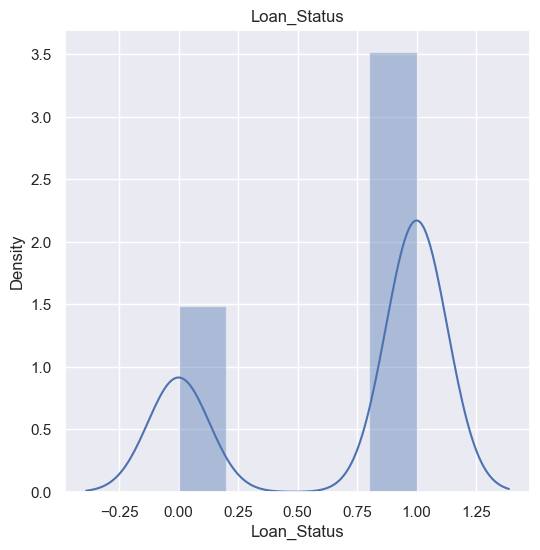

In [148]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Loan_Status'])
plt.title('Loan_Status')
plt.show()

C:\Users\Shreeya Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


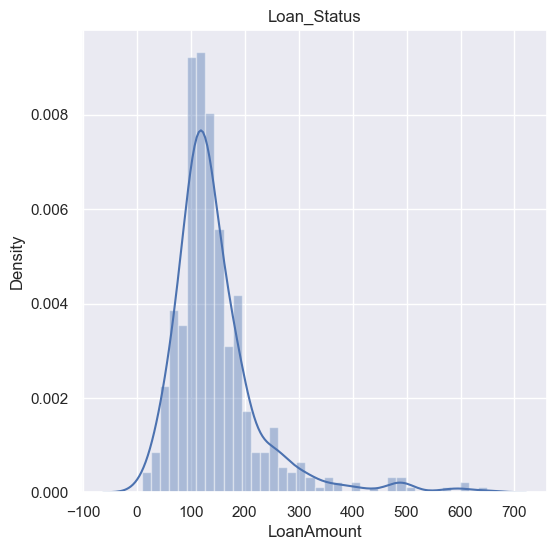

In [149]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LoanAmount'])
plt.title('Loan_Status')
plt.show()

C:\Users\Shreeya Thakur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


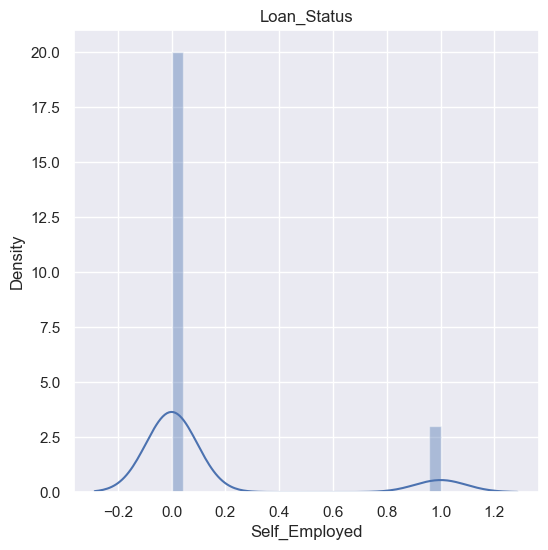

In [150]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Self_Employed'])
plt.title('Loan_Status')
plt.show()

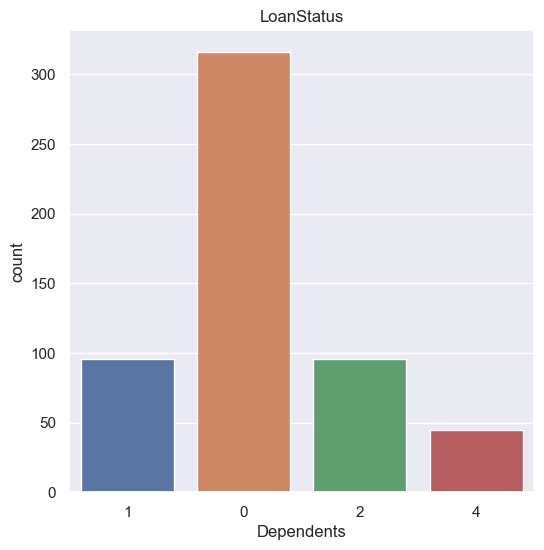

In [151]:
plt.figure(figsize=(6,6))
sns.countplot(x='Dependents', data=df)
plt.title('LoanStatus')
plt.show()

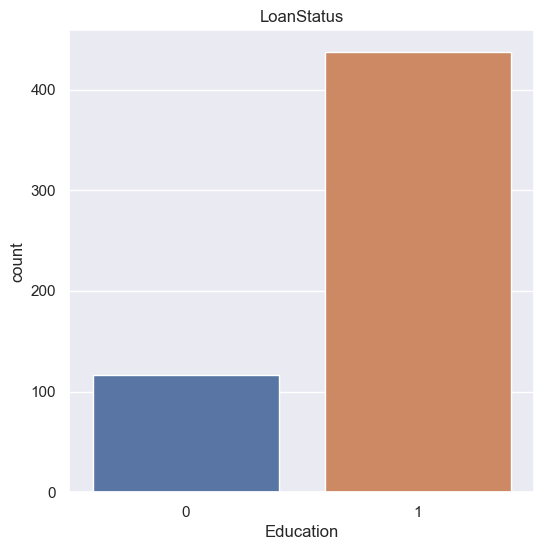

In [152]:
plt.figure(figsize=(6,6))
sns.countplot(x='Education', data=df)
plt.title('LoanStatus')
plt.show()

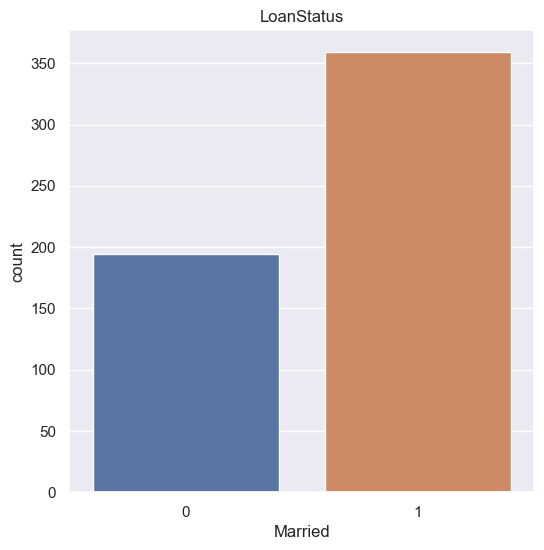

In [153]:
plt.figure(figsize=(6,6))
sns.countplot(x='Married', data=df)
plt.title('LoanStatus')
plt.show()

Let's visualize the null values clearly using heat map

<AxesSubplot:>

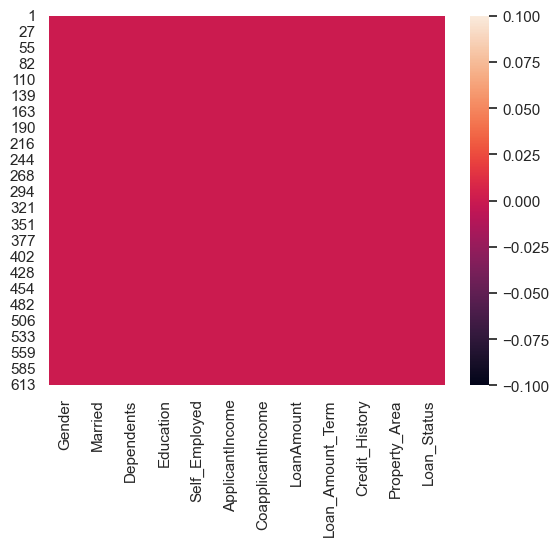

In [154]:
sns.heatmap(df.isnull())

# 18.Relationship between two variables

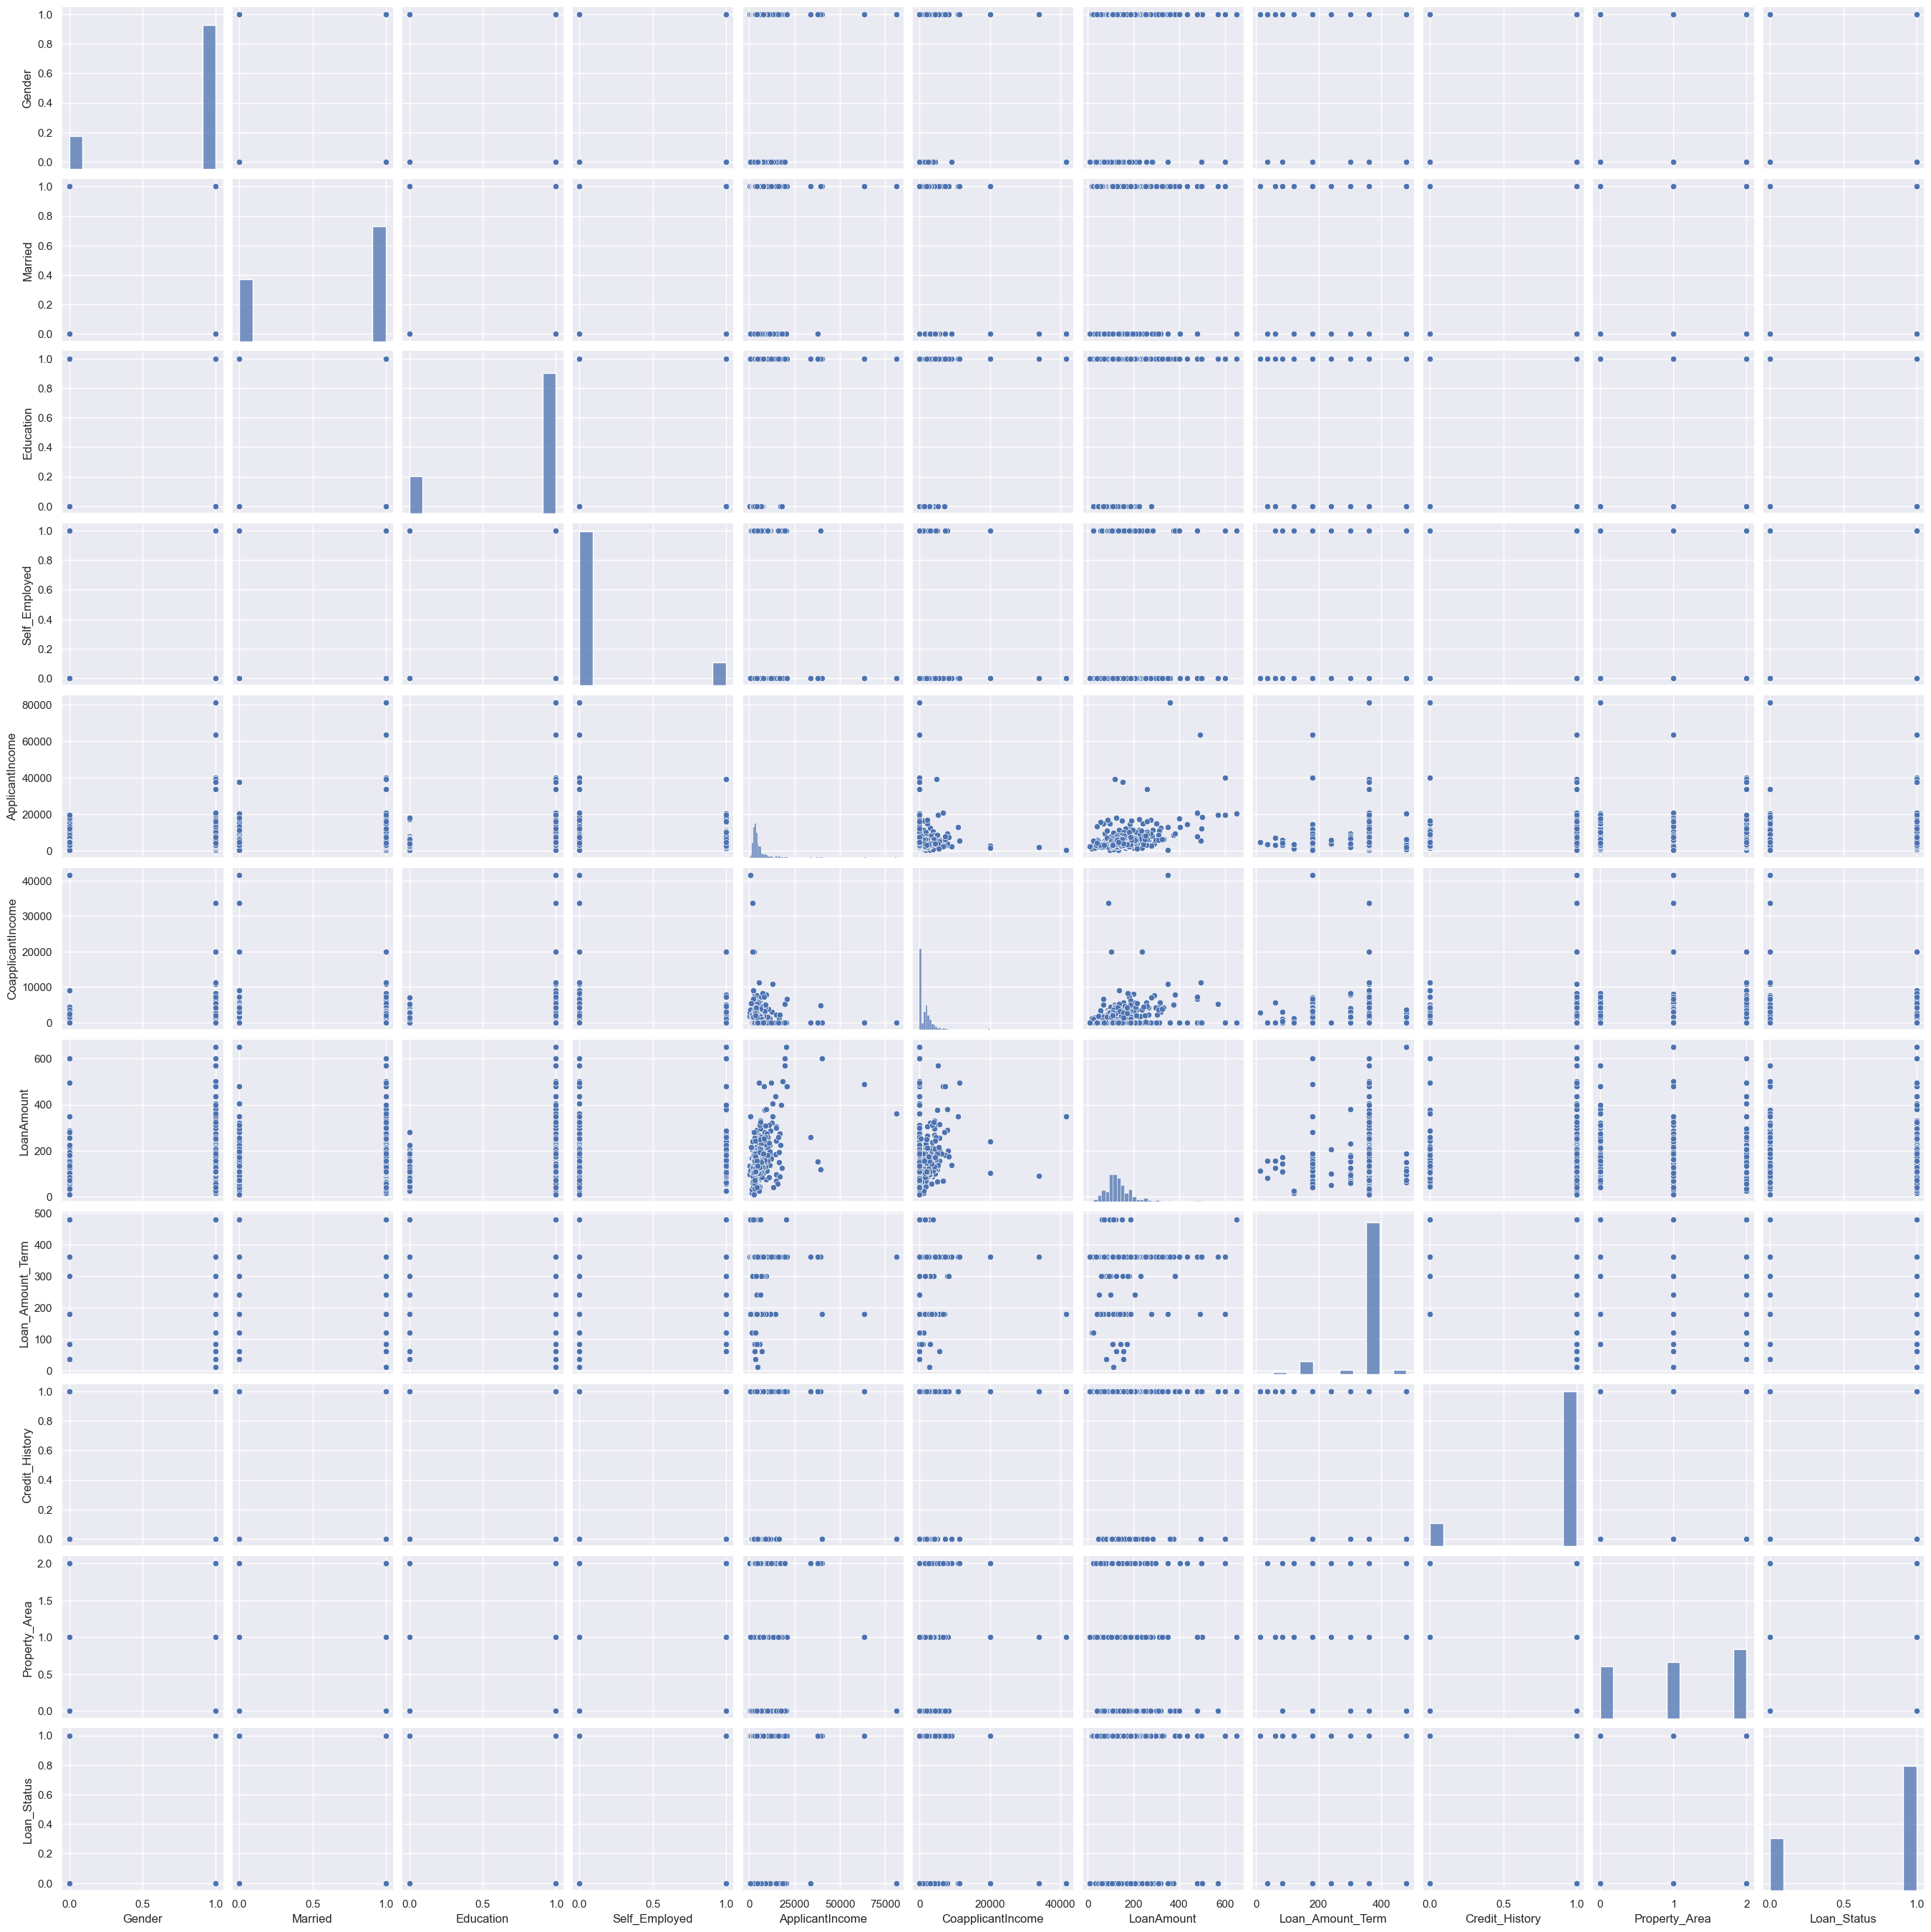

In [155]:
sns.pairplot(df)

<AxesSubplot:>

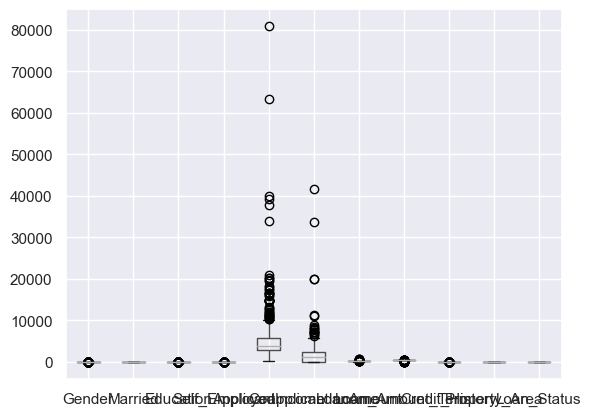

In [156]:
df.boxplot()

<AxesSubplot:ylabel='Loan_Status'>

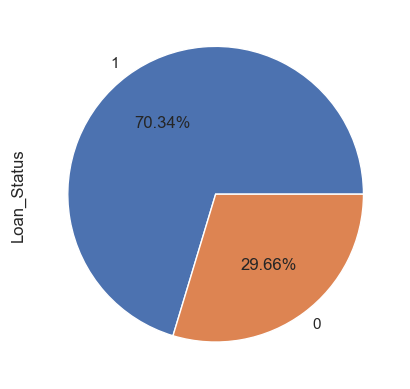

In [157]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

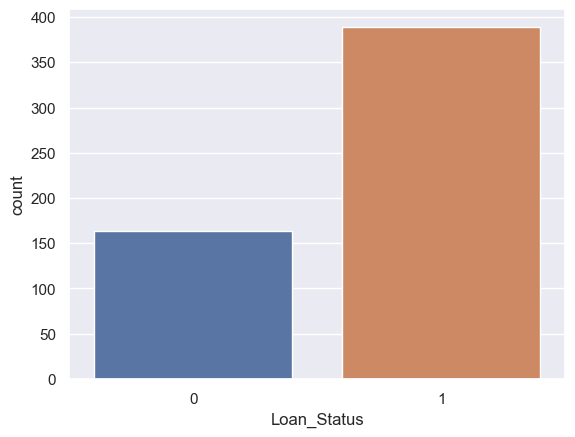

In [158]:
sns.countplot(data=df,x='Loan_Status')

<AxesSubplot:ylabel='Education'>

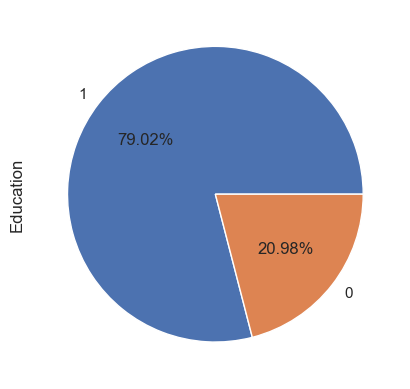

In [159]:
df['Education'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:ylabel='Dependents'>

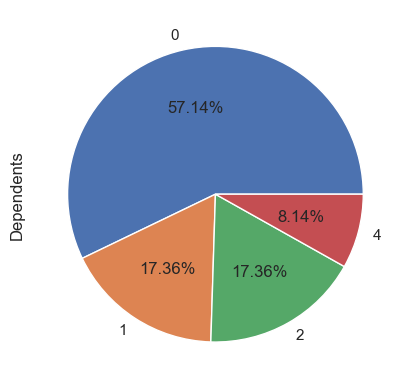

In [160]:
df['Dependents'].value_counts().plot(kind='pie',autopct="%1.2f%%")

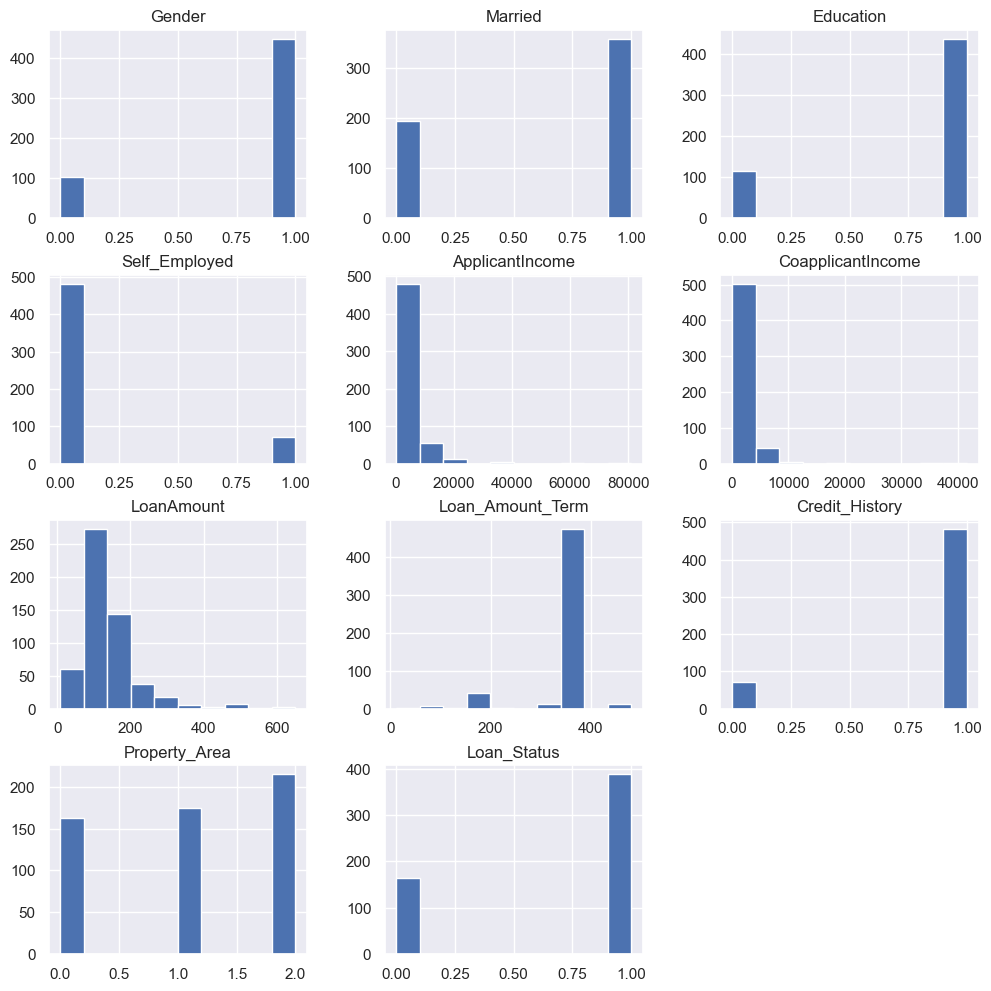

In [161]:
df.hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

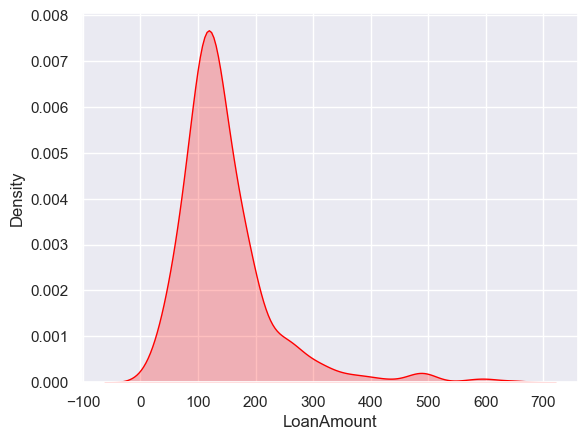

In [162]:
sns.kdeplot(df['LoanAmount'],color='red',shade=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

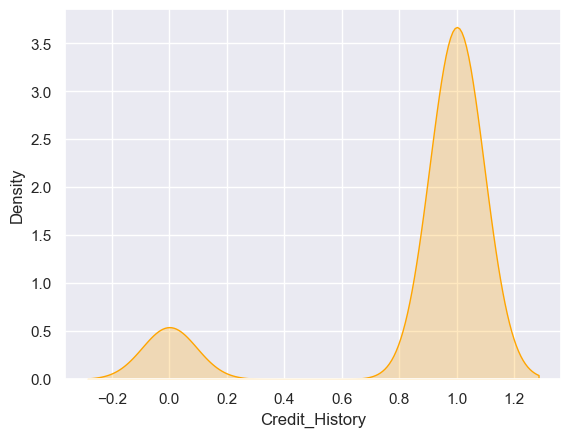

In [163]:
sns.kdeplot(df['Credit_History'],color='orange',shade=True)

# 19. Save The Model

In [165]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [166]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [167]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=270)

In [168]:
import joblib

In [169]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [170]:
model = joblib.load('loan_status_predict')

In [172]:
import pandas as pd
df1 = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [173]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [174]:
result = model.predict(df1)

In [175]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved
